In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
K = 0.2
g = 9.80665
sigmV = 0.01
sigmT = 0.2

epsK 0.0372242437008
k1341404.46073
& 67.9& 41.1& 22.2& 39.1& 18.9& 25.4& 21.2& 19.4& 17.5& 14.7
& 0.3& 1.0& 1.0& 2.5& 1.5& 2.5& 2.5& 2.5& 2.5& 2.5
&0.442&2.433&4.513&6.395&7.949&9.839&11.815&12.92&14.286&17.053
&7.845&33.343&60.801&84.337&107.873&154.945&245.166&302.045&360.885&519.752


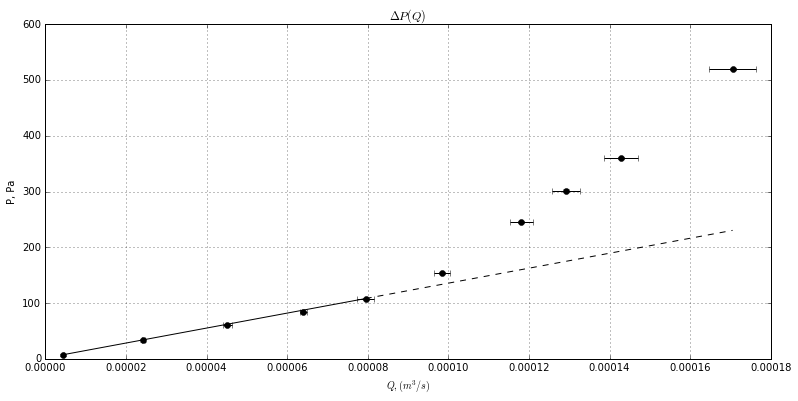

eps_RR0.05128205128205129
eps_etta = 0.0633679185613
etta = 1.52330922816e-05
sigma_etta = 9.65289351135e-07
Re929.976472257


In [165]:
L = 50 *1e-2#cm
d = 3.9 *1e-3# mm

sigm_d = 0.05 * 1e-3
eps_R = sigm_d / d;

R = d / 2.0
kV = 1 #1e-3
kP = g * K
dV1 = np.array([0.3, 1, 1 , 2.5, 1.5, 2.5 , 2.5 , 2.5 , 2.5 , 2.5]) * 1e-3 # dm^3
dV1 = dV1 * kV
dP1 = np.array([4, 17, 31 ,43 , 55 , 79 , 125 , 154, 184 , 265])
dP1 = dP1 * kP
dT1 = np.array([67.94, 41.10, 22.16 ,39.09, 18.87 , 25.41, 21.16, 19.35 , 17.50, 14.66])
dQ1 = dV1/dT1;
n = len(dV1)
m = 5
k = np.mean([(dP1[i] - dP1[i-1])/(dQ1[i]-dQ1[i-1])for i in range(1,m)])
b = dP1[0] - dQ1[0]*k
plt.figure(figsize=(13,6))
plt.grid(True)

#P(Q)
sigma_p = np.array([kP * 1 for i in range(n)])
sigma_t = np.array([0.5 for i in range(n)])
sigma_v = np.array([kV * 0.01 * 1e-3 for i in range(n)])
eps_p = sigma_p / dP1
eps_t = sigma_t / dT1
eps_v = sigma_v / dV1
eps_q = (eps_t**2 + eps_v**2)**(1/2)
eps_pq = (eps_q**2 + eps_p**2)**(1/2)
sigma_q = dQ1 * eps_q

sigma_pq = (dP1/dQ1) * eps_pq
sigma_k = (m-1)**(-1/2) * np.mean(sigma_pq)
eps_k = sigma_k / k;
print('epsK ' + str(eps_k))
print('k' + str(k))

st = ''
sv = ''
sp = ''
sq = ''
for i in range(len(dP1)):
    st += '& ' + str(round(dT1[i],1))
    sv += '& ' + str(round(1e3 * dV1[i],2))
    sp += '&' + str(round(dP1[i],3))
    sq += '&' + str(round(dQ1[i]*1e5,3))
print(st)
print(sv)
print(sq) 
print(sp)

# print(sigma_q)
plt.errorbar(dQ1,dP1, xerr=sigma_q, yerr=sigma_p, fmt='o',color = 'black')
# plt.plot(dQ1, dP1 , '-o',color='black',alpha=1 )
plt.title(r'$\Delta P(Q)$')
plt.xlabel(r'$Q,(m^3/s)$')
plt.ylabel('P, Pa')
plt.plot([dQ1[0],dQ1[m-1]],[b + k*dQ1[0],b + k*dQ1[m-1]],'-',color='black')
plt.plot([dQ1[m-1],dQ1[n-1]],[b + k*dQ1[m-1],b + k*dQ1[n-1]],'--',color='black')

plt.savefig('g1mm.png') 
plt.show()

print('eps_RR' + str(4* eps_R))
eps_etta = (4**2 * eps_R**2 + eps_k**2)**(1/2)
print('eps_etta = ' + str(eps_etta))
etta = np.pi * R**4/(8*L) * k;

sigma_etta = etta * eps_etta
print('etta = ' + str(etta))
print('sigma_etta = ' + str(sigma_etta))
ro = 1.21 
# Q = pi R**2 * v
# Re = ro * (Q/pi*r)
Re = ro * (dQ1[3] + dQ1[4])/2  /(np.pi * R * etta)
print('Re' + str(Re))

0.042265426880811495
&0.105&0.405&0.805&1.305
&27.459&66.685&107.873&164.752


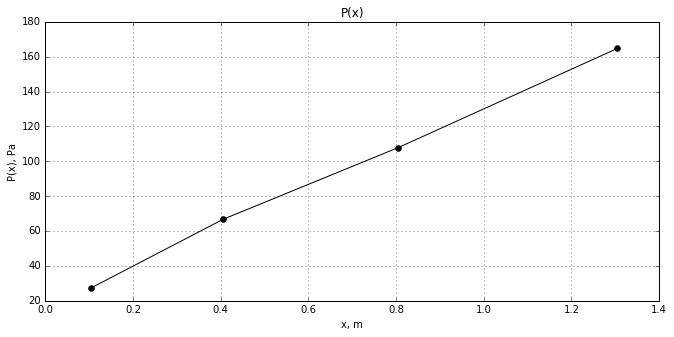

In [177]:
dV = 1
dT = 23.66
print(dV/dT)
dl = np.array([50,90,120,130.5]) * 1e-2
dx = np.array([10.5 , 30 , 40 , 50]) * 1e-2
dP = np.array([29,50,70,84]) * kP
xc = 0
x = []
for dd in dx:
    x.append(dd + xc)
    xc += dd
p = []
for i in range(len(dP)-1) :
    p.append(dP[-1] - dP[len(dP)-i-2])
p.append(dP[-1])
# print(p)
# print(x)
plt.figure(figsize=(11,5))
plt.plot(x,p,'-o',color='black')
plt.grid(True)
sx = ''
sp = ''
for i in range(len(x)) :
    sx += '&' + str(round(x[i],3))
    sp += '&' + str(round(p[i],3))
print(sx)
print(sp)
plt.title('P(x)')
plt.xlabel('x, m')
plt.ylabel('P(x), Pa')
plt.savefig('g11mm.png') 
plt.show()
# dx = [dl[i] - dl[i-1] for i in range(1,len(dl))]
# print(dx)


& 42.2& 27.3& 16.7& 13.8& 19.7& 17.3
& 1.0& 2.5& 3.0& 3.0& 5.0& 5.0
&2.367&9.154&17.986&21.708&25.355&28.868
&7.845&29.42&94.144&137.293&182.404&229.476
epsK 0.101200374236
[  3.66712027e-07   1.71550517e-06   5.42460128e-06   7.88697854e-06
   6.44871381e-06   8.35379831e-06]
317868.005988


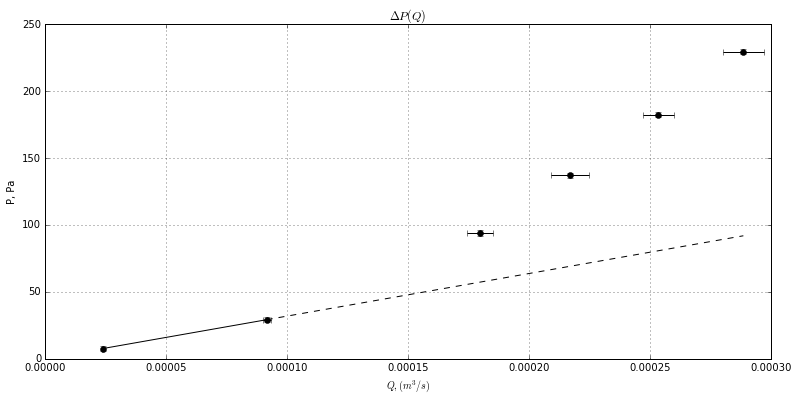

eps_RR0.05128205128205129
eps_etta = 0.11345203625
etta = 1.89070931057e-05
sigma_etta = 2.1450482124e-06
Re937.054489933


In [176]:
d = 5.90 * 1e-3
sigm_d = 0.05 * 1e-3
eps_d = sigm_d / d;

R = d / 2.0
dV1 = np.array([1 , 2.5 , 3 , 3, 5,5]) * 1e-3
dT1 = np.array([42.25 , 27.31 , 16.68, 13.82 , 19.72,17.32])
dP1 = np.array([4 , 15, 48, 70, 93, 117])
dQ1 = dV1/dT1;
dP1 = dP1 * kP
n = len(dV1)
m = 2
k = np.mean([(dP1[i] - dP1[i-1])/(dQ1[i]-dQ1[i-1])for i in range(1,m)])
b = dP1[0] - dQ1[0]*k
plt.figure(figsize=(13,6))
plt.grid(True)
sigma_p = np.array([kP * 1 for i in range(n)])
sigma_t = np.array([0.5 for i in range(n)])
sigma_v = np.array([kV * 0.01 * 1e-3 for i in range(n)])
eps_p = sigma_p / dP1
eps_t = sigma_t / dT1
eps_v = sigma_v / dV1
eps_q = (eps_t**2 + eps_v**2)**(1/2)
eps_pq = (eps_q**2 + eps_p**2)**(1/2)
sigma_q = dQ1 * eps_q

sigma_pq = (dP1/dQ1) * eps_pq
sigma_k = (m-1)**(-1/2) * np.mean(sigma_pq)
eps_k = sigma_k / k;

st = ''
sv = ''
sp = ''
sq = ''
for i in range(len(dP1)):
    st += '& ' + str(round(dT1[i],1))
    sv += '& ' + str(round(1e3 * dV1[i],2))
    sp += '&' + str(round(dP1[i],3))
    sq += '&' + str(round(dQ1[i]*1e5,3))
print(st)
print(sv)
print(sq) 
print(sp)

print('epsK ' + str(eps_k))
print(sigma_q)
plt.errorbar(dQ1,dP1, xerr=sigma_q, yerr=sigma_p, fmt='o',color = 'black')
# plt.plot(dQ1, dP1 , '-o',color='black',alpha=1 )
plt.plot([dQ1[0],dQ1[m-1]],[b + k*dQ1[0],b + k*dQ1[m-1]],'-',color='black')
plt.plot([dQ1[m-1],dQ1[n-1]],[b + k*dQ1[m-1],b + k*dQ1[n-1]],'--',color='black')
plt.title(r'$\Delta P(Q)$')
plt.xlabel(r'$Q,(m^3/s)$')
plt.ylabel('P, Pa')
plt.savefig('g2mm.png') 
print(k)
plt.show()

print('eps_RR' + str(4* eps_R))
eps_etta = (4**2 * eps_R**2 + eps_k**2)**(1/2)
print('eps_etta = ' + str(eps_etta))
etta = np.pi * R**4/(8*L) * k;

sigma_etta = etta * eps_etta
print('etta = ' + str(etta))
print('sigma_etta = ' + str(sigma_etta))

ro = 1.21 
# Q = pi R**2 * v
# Re = ro * (Q/pi*r)
Re = ro * (dQ1[2]+dQ1[1])/2  /(np.pi * R * etta)
print('Re' + str(Re))

0.0842034355001684
&0.105&0.405&0.805&1.305
&23.536&39.227&60.801&88.26


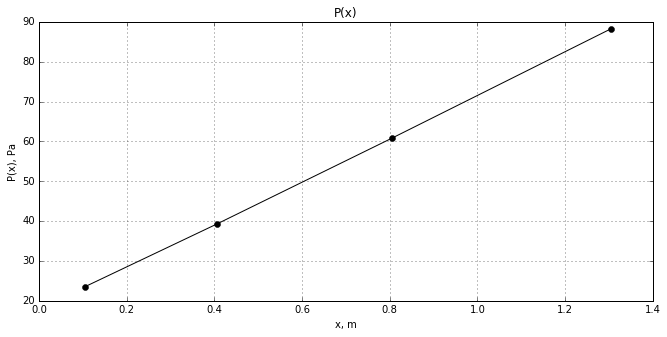

In [178]:
dV = 2.5
dT = 29.69
print(dV/dT)
dl = np.array([50,90,120,130.5])*1e-2
dP = np.array([14,25,33,45]) * kP
dx = np.array([10.5 , 30 , 40 , 50]) * 1e-2
xc = 0
x = []
for dd in dx:
    x.append(dd + xc)
    xc += dd
p = []
for i in range(len(dP)-1) :
    p.append(dP[-1] - dP[len(dP)-i-2])
p.append(dP[-1])
sx = ''
sp = ''
for i in range(len(x)) :
    sx += '&' + str(round(x[i],3))
    sp += '&' + str(round(p[i],3))
print(sx)
print(sp)
# print(x)
# print(p)


plt.figure(figsize=(11,5))
plt.grid(True)
plt.plot(x,p,'-o',color='black')
plt.title('P(x)')
plt.xlabel('x, m')
plt.ylabel('P(x), Pa')
plt.savefig('g22mm.png') 
plt.show()

